In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from table_reader import TableReader
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet

Hey folks, I'm just trying out a proof-of-concept jupyter notebook that uses our data retrieval code.

I got sick of working with environment variables so I switched to a new method to store our DB password:
    1. Create a file called config.json in the project root.
    2. Inside, config.json should look like this:
    {
        "database_url":"database_url_goes_here"
    }

TableReader's other vector methods are geodata_vector() and reviews_vector(). Be sure to call close() when you're done so it terminates the connection to the DB.

In [2]:
tr = TableReader()
df = tr.properties_vector(include_amenitites=True)
tr.close()

<_io.TextIOWrapper name='config.json' mode='r' encoding='UTF-8'>


In [3]:
features = df[df.columns.drop(['price', 'listingID'])]
label = df['price']

In [4]:
model = ElasticNet()
esfm = SelectFromModel(model)
esfm.fit(features, label)
print(list(features.iloc[:, esfm.get_support(indices=True)]))

['accomodates', 'bathrooms', 'bedrooms', 'beds', 'House', 'Townhouse', 'Entire home/apt', 'Private room', 'Family/kid friendly', 'Fire extinguisher', 'TV', 'Self check-in', 'Elevator', 'First aid kit', 'Carbon monoxide detector', 'Free street parking', 'Hot water', 'Laptop friendly workspace', 'Paid parking off premises', 'Gym', 'Hangers', 'Indoor fireplace', 'Breakfast']


In [5]:
model = Lasso()
sfm = SelectFromModel(model)
sfm.fit(features, label)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['accomodates', 'bathrooms', 'bedrooms', 'beds', 'Apartment', 'House', 'Entire home/apt', 'Shared room', 'Kitchen', 'Pets allowed', '24-hour check-in', 'Family/kid friendly', 'Pets live on this property', 'Fire extinguisher', 'Hot tub', 'TV', 'Heating', 'Self check-in', 'Lock on bedroom door', 'Air conditioning', 'Elevator', 'First aid kit', 'Carbon monoxide detector', 'Pool', 'Suitable for events', 'translation missing: en.hosting_amenity_49', 'Free street parking', 'Washer', 'Cable TV', 'Hot water', 'Safety card', 'Laptop friendly workspace', 'Paid parking off premises', 'Private entrance', 'Gym', 'Essentials', 'Hangers', 'Indoor fireplace', 'Internet', 'Private living room', 'Breakfast', 'Buzzer/wireless intercom', 'translation missing: en.hosting_amenity_50', 'Doorman']


In [6]:
model = Ridge()
sfm = SelectFromModel(model)
sfm.fit(features, label)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['bathrooms', 'bedrooms', 'House', 'Serviced apartment', 'Entire home/apt', 'Shared room', 'Pets allowed', 'Family/kid friendly', 'Bathtub', 'Fire extinguisher', 'Hot tub', 'TV', 'Heating', 'Self check-in', 'Air conditioning', 'Elevator', 'Pool', 'Suitable for events', 'translation missing: en.hosting_amenity_49', 'Free street parking', 'Host greets you', 'Paid parking off premises', 'Other', 'Private entrance', 'Gym', 'Hangers', 'Indoor fireplace', 'Private living room', 'Breakfast', 'translation missing: en.hosting_amenity_50', 'Doorman']


In [7]:
elastic_data = df[list(features.iloc[:, esfm.get_support(indices=True)])]

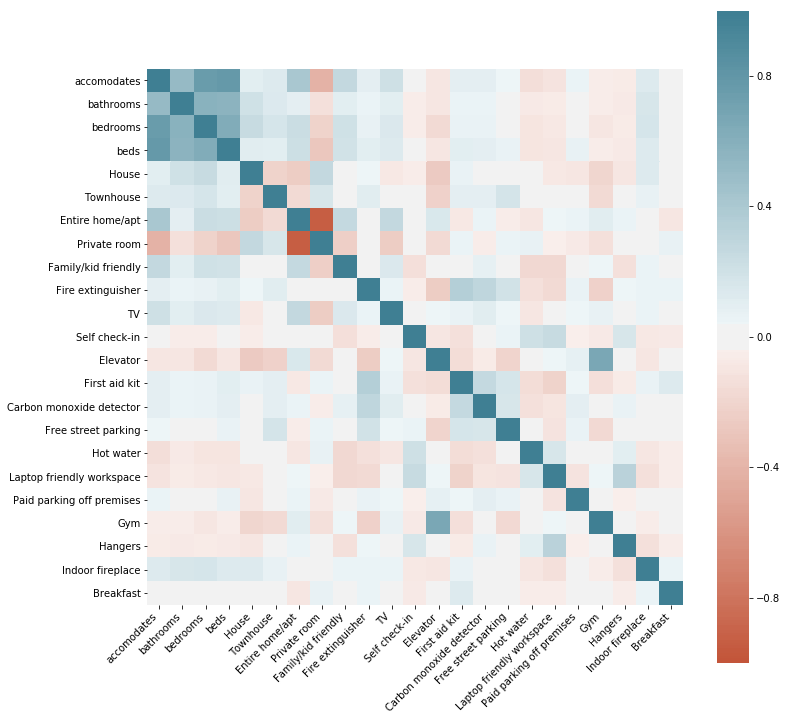

In [8]:
corr = elastic_data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);